In [3]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from pylab import *

import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

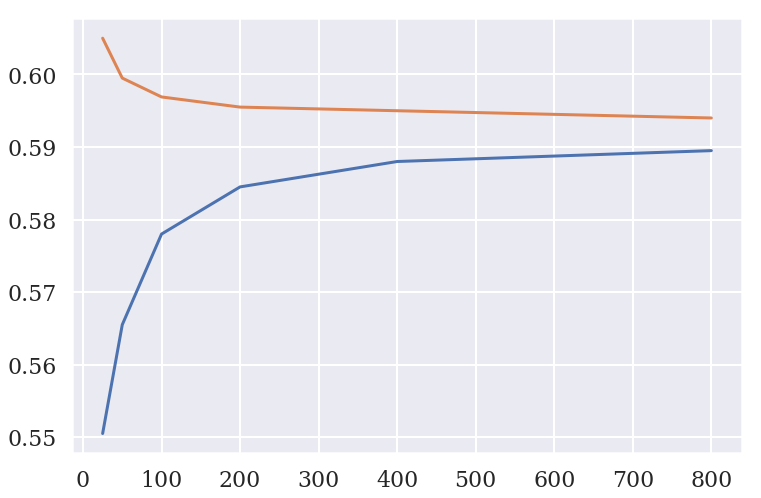

In [5]:
ppiex = array([[0.5505, 0.5655, 0.578, 0.5845, 0.588, 0.5895],
              [0.605, 0.5995, 0.5969, 0.5955, 0.595, 0.594]])

L = array([25, 50, 100, 200, 400, 800])

plot(L, ppiex[0])
plot(L, ppiex[1])
show()

$$ p_{\Pi = x} = p_c C_xL^{-\frac{1}{\nu}} $$
 
$$ p_{x_1} - p_{x_2} = (C_{x_1} - C_{x_2})L^{-\frac{1}{\nu}} $$

$$ \log (p_{x_1} - p_{x_2}) = \log (C_{x_1} - C_{x_2}) - \frac{1}{\nu} \log L $$

$$ \log (p_{\Pi = 0.8} - p_{\Pi = 0.3}) = \log (C_{0.3} - C_{0.8}) - \frac{1}{\nu} \log L $$


Found nu = 1.36652008919 and C_diff = 0.568054171894 using linear regression.


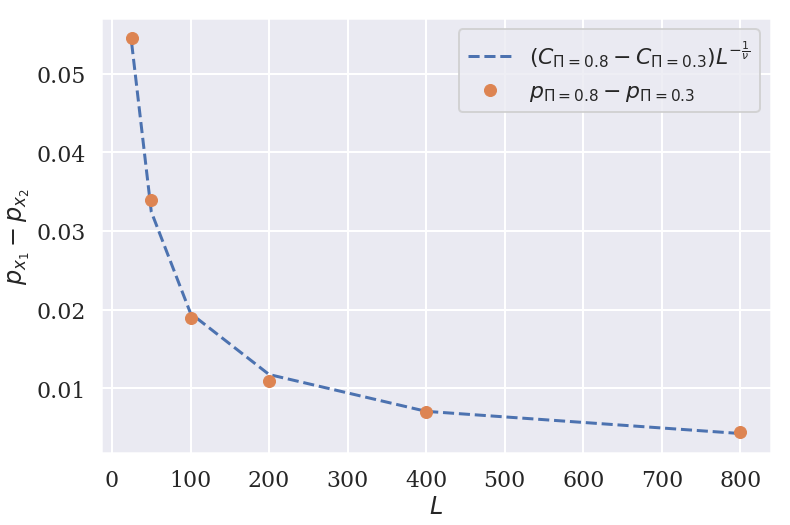

In [6]:
from scipy.stats import linregress

px_diff = ppiex[1] - ppiex[0]
slope, intercept, _, _, _ = linregress(log(L), log(px_diff))

C_diff = exp(intercept)
nu = - 1.0 / slope

print("Found nu = {} and C_diff = {} using linear regression.".format(nu, C_diff))

plot(L, C_diff*L**(-(1.0 / nu)), '--', label=r"$(C_{\Pi = 0.8} - C_{\Pi = 0.3})L^{-\frac{1}{\nu}}$")
plot(L, px_diff, "o", label=r"$p_{\Pi = 0.8} - p_{\Pi = 0.3}$")

xlabel(r"$L$")
ylabel(r"$p_{x_1} - p_{x_2}$")
legend()
show()

In [12]:
def percolation_matrix(p, L):
    """Creates and returns a labeled percolation matrix, and the number of clusters."""
    prob_matrix = rand(L, L)
    perc_matrix = prob_matrix < p
    label_perc_matrix, n_clusters = bwlabel(perc_matrix)
    return label_perc_matrix, n_clusters, perc_matrix


def find_pie(search_area, L, simulations_per_p=1000):
    Pie = zeros(len(search_area))
    
    for i, prob in enumerate(search_area):
        simulation_i = 0
        
        while simulations_per_p > simulation_i:
            lw, num, z = percolation_matrix(prob, L)
            
            perc_h = intersect1d(lw[0, :], lw[-1, :])
            perc_v = intersect1d(lw[:, 0], lw[:, -1])
            perc = concatenate((perc_h[where(perc_h > 0)], perc_v[where(perc_v > 0)]), axis=0)
            perc = unique(perc)
            
            if len(perc) > 0:
                Pie[i] += 1
            simulation_i += 1    
            
    Pie[:] /= simulations_per_p 
    return Pie

In [63]:
Ls = [50, 100, 200, 400, 600]
n = 20
Pie = zeros((len(Ls), n))
u = zeros((len(Ls), n))
nu = 4.0 / 3.0
pc = 0.59275

for i, L in enumerate(Ls):
    ps = array([pc + j*0.1/L**(1.0 / nu) for j in range(-n/2, n/2)])
    Pie[i] = find_pie(ps, L, simulations_per_p=1000)
    u[i] = (ps - pc)*L**(1.0 / nu)

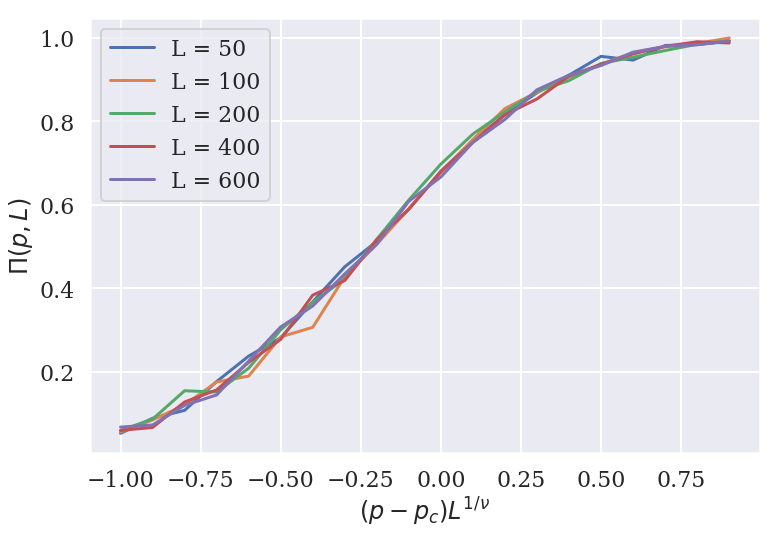

In [64]:
#with sns.cubehelix_palette(n_colors=len(Ls), gamma=1):
for i in range(len(Ls)):
    plot(u[i], Pie[i], label="L = {}".format(Ls[i]))

eps = 2.0E-1
    
xlabel(r"$(p - p_c)L^{1/\nu}$")
ylabel(r"$\Pi (p, L)$")
legend()
show()